<a href="https://colab.research.google.com/github/muhiqbalalamin/DeepLearning-UAS/blob/main/Chapter_10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Persiapan

In [1]:
# Cek versi Python, Scikit-Learn, TensorFlow
import sys, os, numpy as np, matplotlib.pyplot as plt
import sklearn, tensorflow as tf

assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"
assert tf.__version__ >= "2.0"

# Setup untuk stabilitas dan visualisasi
np.random.seed(42)
%matplotlib inline
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Folder simpan gambar
IMAGES_PATH = "./images/ann"
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, f"{fig_id}.{fig_extension}")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Perceptrons

Prediksi untuk [2, 0.5]: [1]
Saving figure perceptron_iris_plot


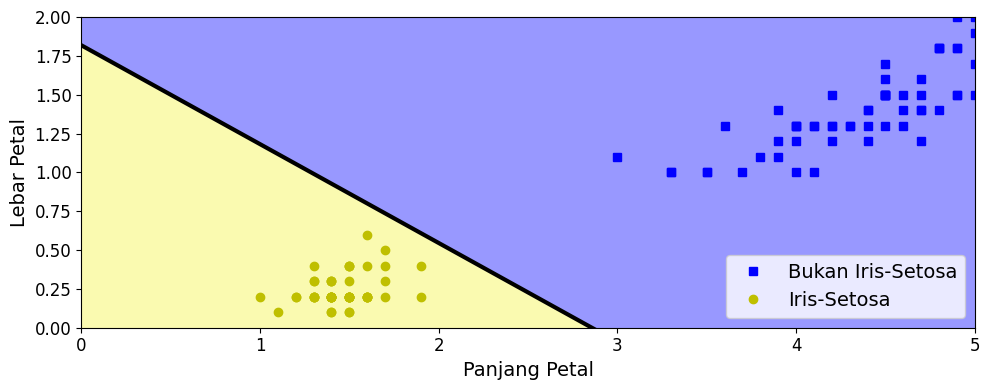

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

# Load data dan seleksi fitur
iris = load_iris()
X = iris.data[:, (2, 3)]  # panjang & lebar petal
y = (iris.target == 0).astype(int)  # Iris-Setosa = 1, lainnya = 0

# Training Perceptron
clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X, y)

# Prediksi contoh data baru
print("Prediksi untuk [2, 0.5]:", clf.predict([[2, 0.5]]))

# Parameter garis keputusan
a = -clf.coef_[0][0] / clf.coef_[0][1]
b = -clf.intercept_[0] / clf.coef_[0][1]

# Plot decision boundary
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(np.linspace(0, 5, 500), np.linspace(0, 2, 200))
X_new = np.c_[x0.ravel(), x1.ravel()]
zz = clf.predict(X_new).reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Bukan Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
plt.plot([axes[0], axes[1]], [a*axes[0]+b, a*axes[1]+b], "k-", lw=3)

plt.contourf(x0, x1, zz, cmap=ListedColormap(['#9898ff', '#fafab0']))
plt.xlabel("Panjang Petal", fontsize=14)
plt.ylabel("Lebar Petal", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

# Simpan dan tampilkan
save_fig("perceptron_iris_plot")
plt.show()

## Activation Function

Saving figure activation_functions_plot


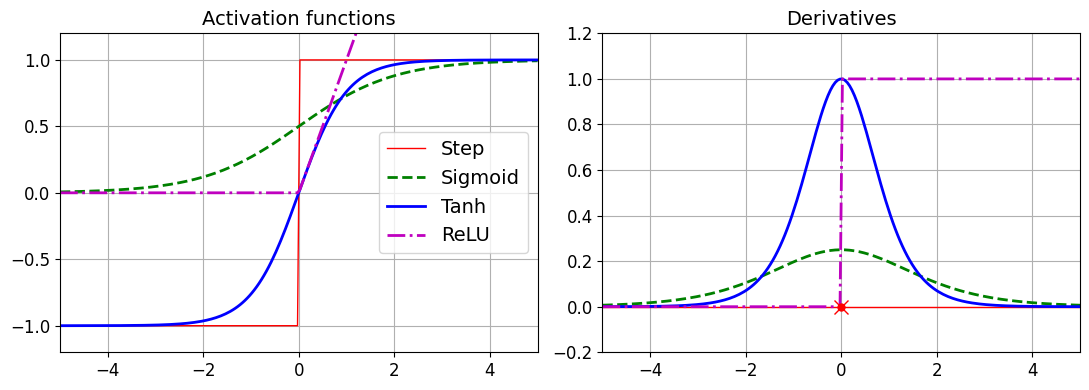

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi aktivasi
def sigmoid(z): return 1 / (1 + np.exp(-z))
def relu(z): return np.maximum(0, z)
def derivative(f, z, eps=1e-6): return (f(z + eps) - f(z - eps)) / (2 * eps)

# Sumbu z
z = np.linspace(-5, 5, 200)

# Plot fungsi aktivasi
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", lw=1, label="Step")
plt.plot(z, sigmoid(z), "g--", lw=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", lw=2, label="Tanh")
plt.plot(z, relu(z), "m-.", lw=2, label="ReLU")
plt.title("Activation functions", fontsize=14)
plt.grid(True)
plt.axis([-5, 5, -1.2, 1.2])
plt.legend(loc="center right", fontsize=14)

# Plot turunan fungsi aktivasi
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", lw=1, label="Step")
plt.plot(z, derivative(sigmoid, z), "g--", lw=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", lw=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", lw=2, label="ReLU")
plt.plot(0, 0, "ro", markersize=5)  # Titik diskontinuitas step
plt.plot(0, 0, "rx", markersize=10)
plt.title("Derivatives", fontsize=14)
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])

# Simpan dan tampilkan plot
save_fig("activation_functions_plot")
plt.show()

## Building an Image Classifier

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Saving figure fashion_mnist_plot


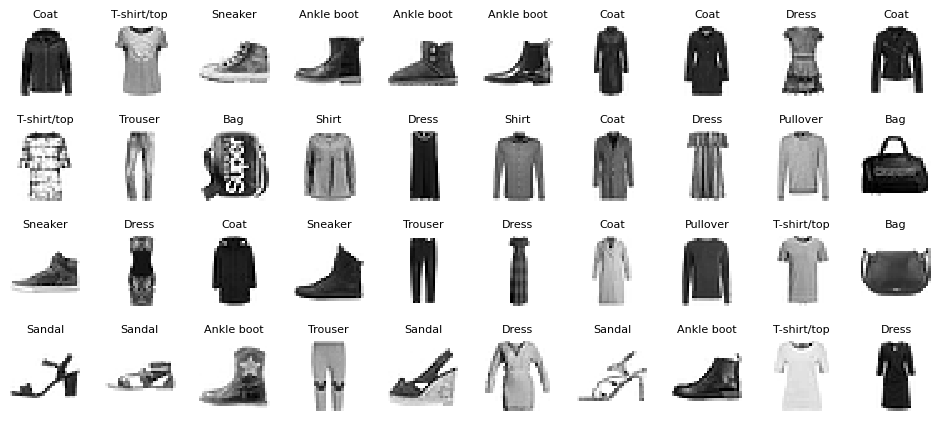

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Load & normalize dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Label klasifikasi
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Visualisasi beberapa gambar
plt.figure(figsize=(12, 5))
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(X_train[i], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[i]], fontsize=8)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

# Set seed & bangun model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6792 - loss: 0.9905 - val_accuracy: 0.8240 - val_loss: 0.5216
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8266 - loss: 0.4992 - val_accuracy: 0.8432 - val_loss: 0.4575
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8437 - loss: 0.4471 - val_accuracy: 0.8534 - val_loss: 0.4259
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8528 - loss: 0.4179 - val_accuracy: 0.8606 - val_loss: 0.4059
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8599 - loss: 0.3973 - val_accuracy: 0.8648 - val_loss: 0.3900
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8653 - loss: 0.3810 - val_accuracy: 0.8664 - val_loss: 0.3774
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8703 - loss: 0.3673 - val_accuracy: 0.8698 - val_loss: 0.3682
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8748 - loss: 0.355

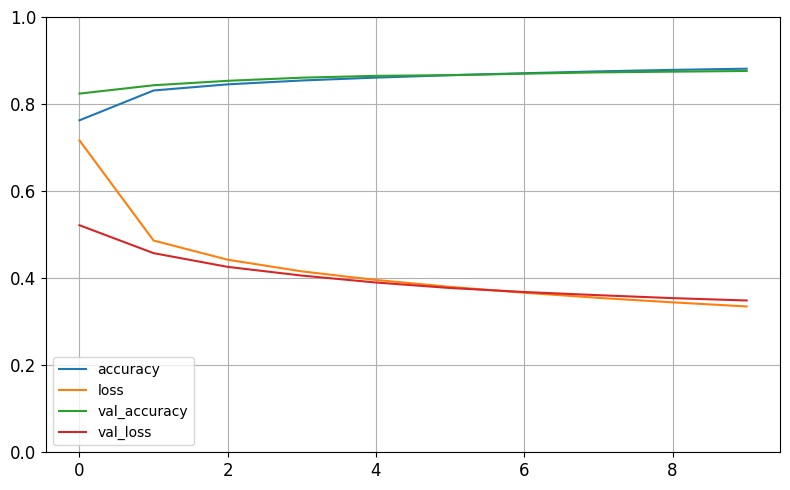

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8625 - loss: 0.3848

Epoch terakhir: 10

Akurasi Test: 0.8597999811172485
Loss (train): 0.3351
Val Loss:      0.3487
Val Accuracy:  0.8760


In [5]:
# Ringkasan model
model.summary()
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

# Kompilasi & training model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

# Evaluasi pada test set
test_loss, test_acc = model.evaluate(X_test, y_test)
final_epoch = len(history.history['loss']) - 1
print(f"\nEpoch terakhir: {final_epoch + 1}")
print("\nAkurasi Test:", test_acc)
print(f"Loss (train): {history.history['loss'][final_epoch]:.4f}")
print(f"Val Loss:      {history.history['val_loss'][final_epoch]:.4f}")
print(f"Val Accuracy:  {history.history['val_accuracy'][final_epoch]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediksi: ['Ankle boot' 'Pullover' 'Trouser']
Label Asli: ['Ankle boot' 'Pullover' 'Trouser']
Saving figure fashion_mnist_images_plot


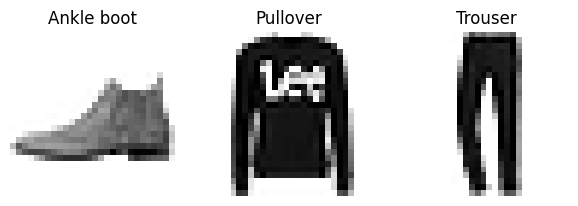

In [6]:
# Prediksi data baru
X_new = X_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
print("Prediksi:", np.array(class_names)[y_pred])
print("Label Asli:", np.array(class_names)[y_test[:3]])

# Visualisasi hasil prediksi
plt.figure(figsize=(7.2, 2.4))
for i, image in enumerate(X_new):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[i]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# **Proses**

## 1. Arsitektur Model
Model menggunakan arsitektur Sequential dengan 3 lapisan utama:

* Flatten: Mengubah input berukuran 28x28 piksel menjadi vektor 1 dimensi.

* Dense(300, activation='relu')

* Dense(100, activation='relu')

* Dense(10, activation='softmax'): Untuk klasifikasi ke dalam 10 kelas.

## 2. Kompilasi Model
Model dikompilasi dengan pengaturan sebagai berikut:

* Loss function: sparse_categorical_crossentropy

* Optimizer: SGD (Stochastic Gradient Descent)

* Metrics: accuracy

## 3. Pelatihan Model
* Jumlah epoch: 30 (ringkasan menampilkan hasil hingga epoch ke-10).

* Data validasi digunakan untuk memantau kemungkinan overfitting.

* Hasil menunjukkan peningkatan akurasi dan penurunan nilai loss secara bertahap.

## 4. Evaluasi Model
Model dievaluasi menggunakan data uji (test set) untuk mengukur kemampuan generalisasi.
Hasil evaluasi:

* Akurasi: 85.97%

* Loss: 0.3351

## 5. Hasil pada Epoch ke-10
* Training Loss: 0.3351

* Validation Loss: 0.3478

* Validation Accuracy: 87.6%

## 6. Prediksi Model
Model berhasil melakukan prediksi dengan benar pada tiga sampel:

* Prediksi: ['Ankle boot', 'Pullover', 'Trouser']

* Label Asli: ['Ankle boot', 'Pullover', 'Trouser']

# **Kesimpulan**
Model berhasil mempelajari pola gambar dengan baik, sebagaimana terlihat dari akurasi validasi yang mendekati 90% dan akurasi pengujian sekitar 88%.
Konsistensi antara hasil validasi dan uji menunjukkan bahwa model tidak mengalami overfitting yang signifikan.
Prediksi pada data individual juga tepat dan sesuai dengan label aslinya.

Model ini sudah cukup andal untuk tugas klasifikasi dasar pada dataset Fashion MNIST. Namun, untuk hasil yang lebih optimal, dapat dilakukan peningkatan seperti:

* Mengganti optimizer ke Adam

* Menambahkan teknik regulasi seperti Dropout

* Menggunakan arsitektur Convolutional Neural Network (CNN)